In [49]:
import cv2
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose
import time
import os
from datetime import datetime


In [50]:
import pafy

import os
import cv2
import pafy
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt
import keras
from sklearn.preprocessing import LabelEncoder

from moviepy.editor import *


from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential #you can use functional lirary for more complex stuff
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model



In [14]:
IMAGE_HEIGHT, IMAGE_WIDTH = 64, 64

SEQUENCE_LENGTH = 20 

DATASET_DIR = 'dataset/'

CLASSES_LIST = ['Sitting', 'Standing']

# Image Analysis and Feature Extraction

In [15]:
def image_analysis(image_path):
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        frame = cv2.imread(image_path)

        if frame is None:  
            return None

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        try:
            results = pose.process(frame)
            landmarks = results.pose_landmarks.landmark
            left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,
                                landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,
                                landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]

            left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,
                            landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,
                            landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]

            left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,
                            landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,
                                landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]

            left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,
                            landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,
                            landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]

            left_knees = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,
                            landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
            right_knees = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,
                                landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]

            left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,
                                landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
            right_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,
                                landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]

            landmark_array = np.array([
                    left_shoulder, right_shoulder,
                    left_elbow, right_elbow,
                    left_wrist, right_wrist,
                    left_hip, right_hip,
                    left_knees, right_knees,
                    left_ankle, right_ankle
                ]).flatten()


            normalized_landmarks = cv2.normalize(landmark_array, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

            return normalized_landmarks
        except:
            return None
        finally:
            image.flags.writeable = True
            # Recolor to BGR
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)



In [16]:
image_path = './dataset/training/sitting_train/105.jpg'
normalized_landmarks = image_analysis(image_path)
if normalized_landmarks is not None:
    print(normalized_landmarks)
else:
    print("Failed to process the image.")


[[ 2.96832529e-01]
 [-1.63133119e-17]
 [ 2.68364292e-01]
 [ 1.71327116e-02]
 [ 2.75770612e-01]
 [ 2.89866811e-01]
 [ 1.85069237e-01]
 [ 2.98847498e-01]
 [ 3.78295639e-01]
 [ 5.03844344e-01]
 [ 3.41839356e-01]
 [ 5.19224501e-01]
 [ 3.68520755e-01]
 [ 5.48658109e-01]
 [ 3.39773476e-01]
 [ 5.87263894e-01]
 [ 7.06671493e-01]
 [ 5.46219346e-01]
 [ 7.54623712e-01]
 [ 4.60605066e-01]
 [ 7.50345145e-01]
 [ 1.00000000e+00]
 [ 7.93870902e-01]
 [ 9.79437457e-01]]


In [6]:
def create_dataset(dataset_path):

    features = []  
    labels = []    
    video_files_paths = []

    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        class_name = class_name.split('_')[0]

        if os.path.isdir(class_path):
            print(f'Extracting Data of Class: {class_name}')

            # data_path = os.path.join(class_path, data_type)
            for i, image_name in enumerate(os.listdir(class_path)):
                image_path = os.path.join(class_path, image_name)
                pose = image_analysis(image_path)
                if isinstance(pose, np.ndarray) == True:
                    features.append(pose)
                    labels.append(class_name)

                    print(f'Processed image number {i} in {class_name}')

    features = np.asarray(features)
    labels = np.array(labels)

    np.save('images_features.npy', features)
    np.save('Images_labels.npy', labels)

    return features, labels




In [31]:
features, labels = create_dataset('./dataset/training')

Extracting Data of Class: sitting
Processed image number 0 in sitting
Processed image number 1 in sitting
Processed image number 2 in sitting
Processed image number 3 in sitting
Processed image number 6 in sitting
Processed image number 10 in sitting


KeyboardInterrupt: 

In [17]:
features = np.load('./images_features.npy')
labels = np.load('./images_labels.npy')


In [18]:
print(features)
print(labels)

[[[0.44653421]
  [0.02145589]
  [0.4296567 ]
  ...
  [0.96326187]
  [0.46993494]
  [0.97643243]]

 [[0.55847994]
  [0.01939473]
  [0.54838793]
  ...
  [0.99011517]
  [0.44413129]
  [1.        ]]

 [[0.08671302]
  [0.10591882]
  [0.09015338]
  ...
  [0.76965902]
  [1.        ]
  [0.78377487]]

 ...

 [[0.52037108]
  [0.0251976 ]
  [0.503582  ]
  ...
  [0.99199207]
  [0.20340446]
  [1.        ]]

 [[0.27635677]
  [0.02561515]
  [0.30127399]
  ...
  [0.98057296]
  [0.05681736]
  [1.        ]]

 [[0.27635677]
  [0.02561515]
  [0.30127399]
  ...
  [0.98057296]
  [0.05681736]
  [1.        ]]]
['sitting' 'sitting' 'sitting' ... 'walking' 'walking' 'walking']


In [19]:
print(features.shape)

(1183, 66, 1)


In [20]:
print(labels.shape)


(1183,)


In [21]:
label_encoder = LabelEncoder()

In [22]:
integer_labels = label_encoder.fit_transform(labels)
 

In [23]:
print(integer_labels)

[0 0 0 ... 1 1 1]


In [24]:
one_hot_encoded_labels = to_categorical(integer_labels)
print(one_hot_encoded_labels)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


# LSTM Model

## Creating LSTM model, plotting it, and compiling it

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten , GlobalAveragePooling1D


In [41]:
def create_pose_lstm_model(dimension_1, dimension_2, num_classes):
    model = Sequential()

    model.add(LSTM(64, input_shape=(dimension_1, dimension_2), return_sequences=True))
    model.add(Dropout(0.5))

    model.add(LSTM(64, return_sequences=True))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    
    model.add(Dense(num_classes, activation='softmax'))

    model.summary()

    return model


lstm_model = create_pose_lstm_model(features.shape[1], features.shape[2], 2)



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 66, 64)            16896     
                                                                 
 dropout_4 (Dropout)         (None, 66, 64)            0         
                                                                 
 lstm_5 (LSTM)               (None, 66, 64)            33024     
                                                                 
 dropout_5 (Dropout)         (None, 66, 64)            0         
                                                                 
 flatten_5 (Flatten)         (None, 4224)              0         
                                                                 
 dense_10 (Dense)            (None, 128)               540800    
                                                                 
 dense_11 (Dense)            (None, 2)                

In [42]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, LSTM, Dense, Dropout, Flatten
from tensorflow.keras import regularizers


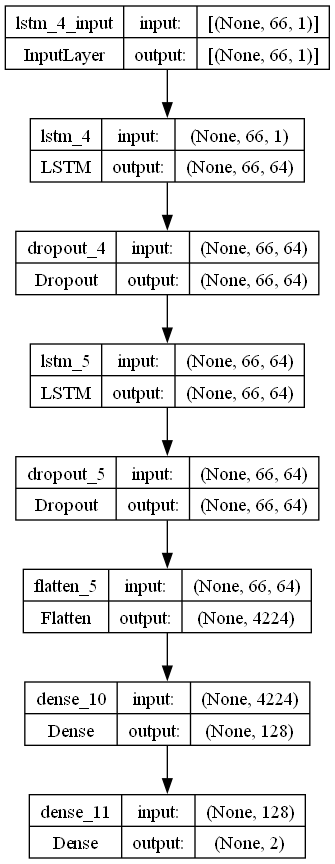

In [43]:
plot_model(lstm_model, to_file='lstm_model_stucture_plot.png', show_shapes=True, show_layer_names=True)

In [51]:
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


## Train Test Split the Data

In [44]:
seed_constant = 27
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels, test_size=0.25, shuffle=True, random_state=seed_constant)

In [45]:
features_train.shape


(887, 66, 1)

In [46]:
features_test.shape


(296, 66, 1)

In [47]:
labels_train.shape


(887, 2)

In [39]:
labels_test.shape

(296, 2)

## Training the Model

In [52]:
lstm_training_history = lstm_model.fit(features_train, labels_train, epochs=100, validation_split=0.2)


Epoch 1/100
23/23 [==============================] - 7s 116ms/step - loss: 0.6308 - accuracy: 0.6629 - val_loss: 0.7300 - val_accuracy: 0.5955
Epoch 2/100
23/23 [==============================] - 1s 62ms/step - loss: 0.6369 - accuracy: 0.6841 - val_loss: 0.6719 - val_accuracy: 0.5955
Epoch 3/100
23/23 [==============================] - 1s 63ms/step - loss: 0.6214 - accuracy: 0.6841 - val_loss: 0.6754 - val_accuracy: 0.5955
Epoch 4/100
23/23 [==============================] - 1s 59ms/step - loss: 0.6217 - accuracy: 0.6841 - val_loss: 0.7153 - val_accuracy: 0.5955
Epoch 5/100
23/23 [==============================] - 1s 63ms/step - loss: 0.6172 - accuracy: 0.6841 - val_loss: 0.7341 - val_accuracy: 0.5955
Epoch 6/100
23/23 [==============================] - 1s 63ms/step - loss: 0.6335 - accuracy: 0.6841 - val_loss: 0.7829 - val_accuracy: 0.5955
Epoch 7/100
23/23 [==============================] - 1s 62ms/step - loss: 0.6172 - accuracy: 0.6841 - val_loss: 0.7042 - val_accuracy: 0.5955
Epoch

## Evaluation

In [53]:
CLASSES_LIST = ['sitting', 'walking']

In [54]:
def plot_metric(model_training_history, metric_name_1, metric_name_2, plot_name):

    metric_value_1 = model_training_history.history[metric_name_1]
    metric_value_2 = model_training_history.history[metric_name_2]

    epochs = range(len(metric_value_1))

    plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
    plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)

    plt.title(str(plot_name))

    plt.legend()



In [55]:
def make_predictions(images,model):
    predictions = model.predict(images)
    print(predictions)
    print(len(predictions))
    predicted_label = np.argmax(predictions)

    predicted_class_name = CLASSES_LIST[predicted_label]
    print(predicted_label)
    return predicted_class_name



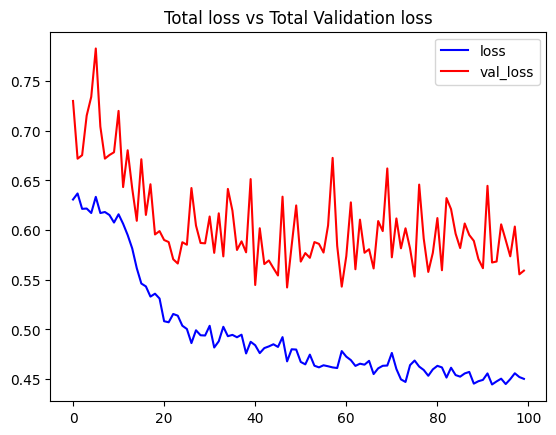

In [56]:
plot_metric(lstm_training_history, 'loss', 'val_loss', 'Total loss vs Total Validation loss')

In [63]:
date_time_format = '%Y_%m_%d_%H_%M_%S'
current_date_time_dt = dt.datetime.now()
current_date_time_string = dt.datetime.strftime(current_date_time_dt, date_time_format)
model_file_name = f'lstm_model_Date_Time{current_date_time_string}.h5'

lstm_model.save(model_file_name)

# Implementing Simple Neural Network Model

In [27]:
from keras.models import load_model


In [31]:
def create_simple_model(input_dim, output_dim):
    model = Sequential()
    model.add(Flatten(input_shape=(input_dim, 1)))
    model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(output_dim, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

simple_model = create_simple_model(features.shape[1], 2)


In [60]:
simple_model_training_history = simple_model.fit(features_train, labels_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
23/23 [==============================] - 0s 9ms/step - loss: 0.6860 - accuracy: 0.6939 - val_loss: 0.7767 - val_accuracy: 0.5730
Epoch 2/10
23/23 [==============================] - 0s 7ms/step - loss: 0.6692 - accuracy: 0.6897 - val_loss: 0.7369 - val_accuracy: 0.6011
Epoch 3/10
23/23 [==============================] - 0s 7ms/step - loss: 0.6718 - accuracy: 0.7010 - val_loss: 0.7287 - val_accuracy: 0.6124
Epoch 4/10
23/23 [==============================] - 0s 5ms/step - loss: 0.6535 - accuracy: 0.6883 - val_loss: 0.7145 - val_accuracy: 0.6180
Epoch 5/10
23/23 [==============================] - 0s 6ms/step - loss: 0.6466 - accuracy: 0.6784 - val_loss: 0.7122 - val_accuracy: 0.6124
Epoch 6/10
23/23 [==============================] - 0s 6ms/step - loss: 0.6310 - accuracy: 0.7024 - val_loss: 0.7078 - val_accuracy: 0.6067
Epoch 7/10
23/23 [==============================] - 0s 6ms/step - loss: 0.6240 - accuracy: 0.7010 - val_loss: 0.7130 - val_accuracy: 0.5899
Epoch 8/10
23/23 [==

In [62]:
date_time_format = '%Y_%m_%d_%H_%M_%S'
current_date_time_dt = dt.datetime.now()
current_date_time_string = dt.datetime.strftime(current_date_time_dt, date_time_format)
model_file_name = f'simple_model_Date_Time{current_date_time_string}.h5'

lstm_model.save(model_file_name)

simple_model.save(model_file_name)



## Evaluation of Simple Model

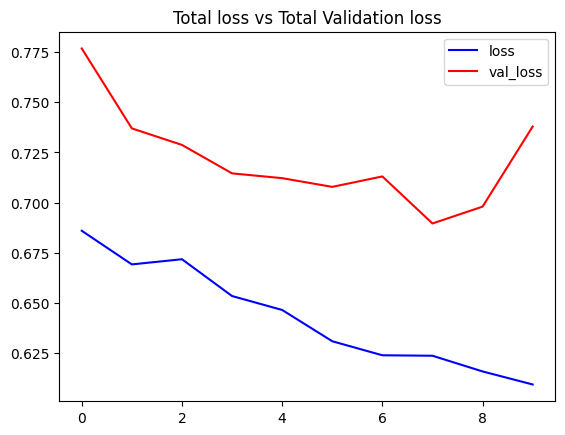

In [64]:
plot_metric(simple_model_training_history, 'loss', 'val_loss', 'Total loss vs Total Validation loss')

## PLotting simple model Neural Network Architecture

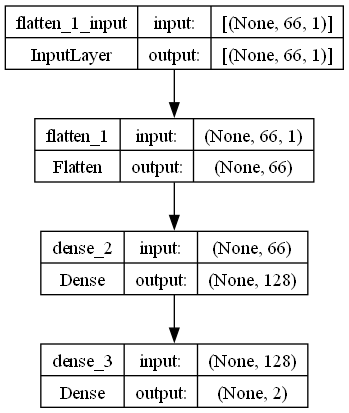

In [29]:
plot_model(simple_model, to_file='simple_model_structure_plot.png', show_shapes=True, show_layer_names=True)


In [36]:
video_reader = cv2.VideoCapture(0)
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    start_time = datetime.now()
    frames_list = []

    while video_reader.isOpened():
        ret, frame = video_reader.read()

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False


        results = pose.process(image)

        try:
            if results.pose_landmarks:
                print('detected something')
                landmarks = results.pose_landmarks.landmark

                left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,
                                landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
                right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,
                                landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]

                left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,
                            landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
                right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,
                            landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]

                left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,
                            landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
                right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,
                                landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]

                left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,
                            landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
                right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,
                            landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]

                left_knees = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,
                            landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
                right_knees = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,
                                landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]

                left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,
                                landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
                right_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,
                                landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]

                landmark_array = np.array([
                    left_shoulder, right_shoulder,
                    left_elbow, right_elbow,
                    left_wrist, right_wrist,
                    left_hip, right_hip,
                    left_knees, right_knees,
                    left_ankle, right_ankle
                ]).flatten()

                normalized_landmarks = cv2.normalize(landmark_array, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
                if normalized_landmarks.shape == (24,1):
                    frames_list.append(normalized_landmarks)
                
                elapsed_time = datetime.now() - start_time

                if elapsed_time.seconds >= 20:
                    print(normalized_landmarks)
                    selected_frames = frames_list[:20]
                    start_time = datetime.now()
                    frames_list = []
                    if len(selected_frames) == 20:
            
                        current_batch_predictions = []
                        for image in selected_frames:
                            current_batch_predictions.append(make_predictions(image, simple_model))
                        print(current_batch_predictions)

                image.flags.writeable = True
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

                mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                        mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),
                                        mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
                                        )
                make_predictions(normalized_landmarks, simple_model)


                cv2.imshow('Mediapipe Feed', image)
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

        except Exception as e:  
            print(f"Error: {e}")

    video_reader.release()
    cv2.destroyAllWindows()


detected something
Error: in user code:

    File "c:\Users\sally\anaconda3\envs\ece5831-2023\lib\site-packages\keras\src\engine\training.py", line 2341, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\sally\anaconda3\envs\ece5831-2023\lib\site-packages\keras\src\engine\training.py", line 2327, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\sally\anaconda3\envs\ece5831-2023\lib\site-packages\keras\src\engine\training.py", line 2315, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\sally\anaconda3\envs\ece5831-2023\lib\site-packages\keras\src\engine\training.py", line 2283, in predict_step
        return self(x, training=False)
    File "c:\Users\sally\anaconda3\envs\ece5831-2023\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\sally\anaconda3\envs\ece5

KeyboardInterrupt: 

In [12]:
from scipy.io import loadmat

# Load the MATLAB file
mat_data = loadmat('mpii_human_pose_v1_u12_1.mat')

# Access annotations
annotations = mat_data['RELEASE']

# The 'annolist' field contains information about each image
annolist = annotations['annolist'][0, 0]

# Accessing file names
image_names = [str(name[0]) for name in annolist['image'][0]]

# Accessing keypoints (assuming there might be multiple 'annorect' entries)
annorect_entries = annolist['annorect'][0]

# Extracting keypoints from each 'annorect' entry
keypoints_list = []
for entry in annorect_entries:
    if 'annopoints' in entry.dtype.names and entry['annopoints'][0, 0].shape[0] > 0:
        points = entry['annopoints'][0, 0]['point'][0]
        keypoints_list.append(points)



FileNotFoundError: [Errno 2] No such file or directory: 'mpii_human_pose_v1_u12_1.mat'